<figure>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=50 ALIGN="right">
</figure>

*CSCI 3022 - Yoshie Bell-Souder*

   ## Did Covid-19 really affect world happiness?

## Intoroduction

COVID-19 was an unexpected situation all over the world. Every day we had heard sad news about healkth problems and about people dying. In addition, we were afraid of the seemingly endless suffering.  The first peak of cases came down slowly, although we would like to try to be over the pandemic life. I am wondering about how people's happiness was changed before and after pandemic. Will it be the same as before overall, or did people's thoughts change and their happiness will be affected? Because of this, I decided that the theme of my project for this class would be world happiness and COVID-19.

The World Happiness Report has been released by the United Nation Sustainable Development Solutions Network every year since 2012 (Helliwell et al, 2022). The UNSDSN calculated a happiness score for each country using survey data from around the world.  They also compare the hapiness score of many countries using lots of different data, such as GDP, income, healthy life expectancy and the opinions of residents and so on. Contries were ranked by the hapiness scores.  The survey also rated the following on a scale of 1-10, with 1 being the lowest and 10 being the highest: how people feel about freedom of choice in their country; how much social support they have; and how generous they are. In adition, I would like to use COVID-19 case numbers and deaths for each country to compare hapiness scores.

This data has many variables, but I will first work on a linear regression model to model the change in world hapiness scores from 2019 to 2021 regressed on the COVID-19 data.  I will also attempt to use the other 2019 variables, such as GDP, to control for their effect.  My goal is to inform what is important for our happiness using the trend of happiness before and after the pandemic.

In searching for this data online, there are so many world happiness comprison by year, disussions and analyses. The differnt part in my project is including the COVID-19 data.  I will focus specifically on data from 2019 and 2021 to compare people's situation in the world when people had similar sad situations and living remote lives.

## Data collection, processing and cleanup

Steps:
I examined a couple of different versions of the same year and I noticed the format of the data changes slightly every year. Therefore I cleaned up the data to focus on 8 different variables for each country from both years. These items are the happiness score, happiness ranking, GDP, social support, health and life expectancy, freedom of choice, generosity, and perceptions of corruption.  To enable comparisons by country, I cleaned up the data to only include countries that had data for both years.

The data originally comes from: https://worldhappiness.report/

However, I found it easier to work with the compiled data that was available via Kaggle:

- 2019: https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2019.csv
- 2021: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021
- Covid Dataset: 
https://www.kaggle.com/datasets/imdevskp/corona-virus-report?select=country_wise_latest.csv

The second step is to match the header column names and the same ordering. We do need to be aware of null values, but these datasets did not have null data.  So we just match the data that is actually present, in order to do the comparison.  Then merge the COVID-19 data.

The third step is how to measure/conclude the data. I will plan to use multiple-linear regression against the happiness score.<br>


1. Change in Happiness score: The difference (subtract) between 2019 and 2021. For example, Happiness ranking #1 country was Finland. Their score was 7.769 in 2019, and 7.842 in 2021. I use those data as 0.073 (7.842 - 7.769).  According to the World happiness report website, 2019 scores came from the average from 2005 to 2018.  2021 scores came from the average from 2005 to 2020. 
<br> There are only 2 years of additional data so it may not be much dramatically different score. <br>It may be hard to lead the summary, because it may not be significant points or reason. However, I will try to conclude based on my collection of datasets.<br>

2. Covid Case/death per capita: <br>
This dataset is based on WHO, the world health organization.  The Weekly Epidemiological Update provides an overview of the global, regional, and country-level COVID-19 cases and deaths, and is put together in 2020 Jan 20.<br>

3. Six features from <br>

- Gross domestic product (GDP) per capita:  The measurement is by World Bank of the growth rate in GDP from previous year. (%)
- Freedom to make life choices: Individuals can choose from more than two selections by themselves.  The data is from the world happiness report, and comes from questionnaires.
- Social support:  Providing/supporting by phonological and productive others. The measurement by the world happiness report.
- Healthy life expectancy: how long on average in the country do people live. The dataset is by the Ministry of Health Department(WHO).
- generosity: the sacrifice of the giver, as a proportion of the financial resources of the person giving. The measurement by the world happiness report.
- Perceptions of corruption: how corrupte are civil servants and politicians perceived to be. The dataset is by Transparency International.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import math
whr19 = pd.read_csv('world-happiness-report-2019.csv')

In [2]:
whr19 = whr19[['Country', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 
               'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
whr19.head()

,Country,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


To do the EDA, we will examine the distribution of relavent variables.

Text(0.5, 0, 'Perceptions of corruption')

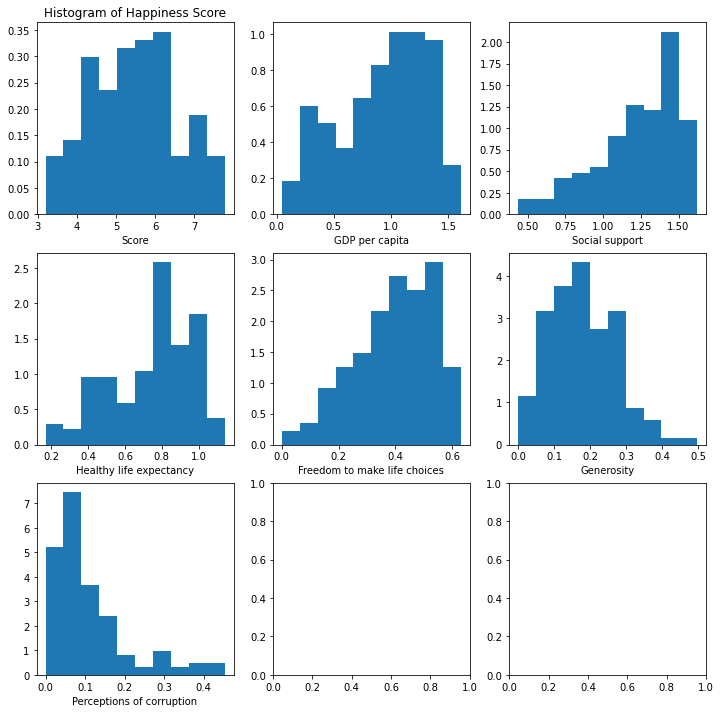

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharey=False, figsize=(12,12))

# matplotlib histogram
axes[0,0].hist(whr19['Score'], density=True, bins = 10)
axes[0,1].hist(whr19['GDP per capita'], density=True, bins = 10)
axes[0,2].hist(whr19['Social support'], density=True, bins = 10)
axes[1,0].hist(whr19['Healthy life expectancy'], density=True, bins = 10)
axes[1,1].hist(whr19['Freedom to make life choices'], density=True, bins = 10)
axes[1,2].hist(whr19['Generosity'], density=True, bins = 10)
axes[2,0].hist(whr19['Perceptions of corruption'], density=True, bins = 10)

# Add labels
axes[0,0].set_title('Histogram of Happiness Score')
axes[0,0].set_xlabel('Score')
axes[0,1].set_xlabel('GDP per capita')
axes[0,2].set_xlabel('Social support')
axes[1,0].set_xlabel('Healthy life expectancy')
axes[1,1].set_xlabel('Freedom to make life choices')
axes[1,2].set_xlabel('Generosity')
axes[2,0].set_xlabel('Perceptions of corruption')

The happiness score looks like it might be normally distributed. However, most of other variables are not normally distributed. GDP, for example, is positively skewed. To correct this, I would like to transform the data so that it is more normal. 

Here is an example of the COVID-19 data.

In [4]:
covid19 = pd.read_csv('covid_19_clean_complete.csv')
covid19 = covid19[['Country/Region', 'Confirmed per capita', 'Deaths per capita', ]]
covid19.head()

,Country/Region,Confirmed per capita,Deaths per capita
0,Afghanistan,0.000898,0.000031
1,Albania,0.001701,0.000050
2,Algeria,0.000621,0.000026
3,Andorra,0.011725,0.000672
4,Angola,0.000027,0.000001


Text(0.5, 0, 'Deaths')

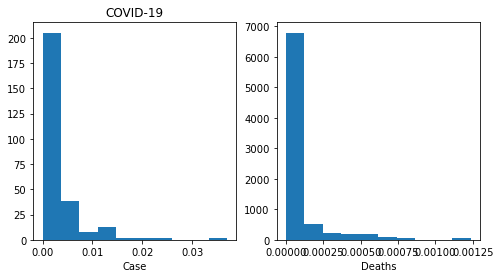

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(8,4))

# matplotlib histogram
axes[0].hist(covid19['Confirmed per capita'], density=True, bins = 10)
axes[1].hist(covid19['Deaths per capita'], density=True, bins = 10)


# Add labels
axes[0].set_title('COVID-19')
axes[0].set_xlabel('Case')
axes[1].set_xlabel('Deaths')


## Planned Models 

My hypothesis is that Covid-19 affected happiness scores. 

(formula='Happiness score ~ Covid-19 case')  <be>
    
$\beta_1 =$ coefficient for Covid-19 cases

H0: $\beta_1=0$
    
H1: $\beta_1\ne0$
    
I will run the following modeling tests. (Full F-test)
    
(formula='Happines score ~ Covid case)  <br>
(formula='Happines score ~ Covid death) <br>
(formula='Happines score ~ Covid case + Covid death) <br>(t-test)
    

In addition, I will test if Covic-19 cases had an effect on happiness scores when controling for effects of other variables that have previously shown to have an effect on happiness scores. (Partial F-test)
    
(formula='Happines score ~ Covid case + Covid death')<br>
(formula='Happines score ~ Covid case + Covid death + GDP + Freedom ... + perceptions of curruption')
(formula='Happines score ~ GDP + Freedom ... + perceptions of curruption')

If Covid-19 cases and Covid-19 deaths are collinear, which is likely, I will remove Covid-19 deaths from the model to meet the assumption of independence of predictors. (t-test)  The reason to remove the Covid-19 deaths instead of the cases would be because deaths may be impacted more complicated factors, such as age or prior health, but cases affect happiness directly for more people.  
    
(formula='Happines score ~ Covid case')<br>
(formula='Happines score ~ Covid case + GDP + Freedom ... + perceptions of curruption')

There are many interesting questions beyond this, but I would like to focus on the questions above in this class project. 
    
## Summary

I will check the collinearly each of variable against each other. <br>
For example, Covid case and death may be corelated each other.  GDP and freedom, and Covid case may be corelated using multiple colliniarity.  For predictors of regression model that are colliniar, I will remove them from the regression model, then explain the principal reasons.  

I will compare the change between 2021 and 2019 data from the World Hapiness Report and test if COVID-19 is correlated to this change.  I will do this with a hypothosis test using linear regression.  My null hypothosis that there is no effect of COVID-19 on changes in Happiness Scores.  My alternative hypothosis is that there was some effect of COVID-19 on changes in Happiness scores.  I will also try to control for effects of other variables such as GDP.

## Reference

Helliwell, J. F., Layard, R., Sachs, J. D., De Neve, J.-E., Aknin, L. B., & Wang, S. (Eds.). (2022). World Happiness Report 2022. New York: Sustainable Development Solutions Network.